## Рынок заведений общественного питания Москвы

### Описание проекта
Есть идея открыть небольшое кафе в Москве. Гостей будут обслуживать роботы. Необходимо подготовить исследование рынка общественного питания и презентацию для инвесторов. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Шаг №1. Подготовка данных

In [2]:
# Считываем данные
df = pd.read_csv('/datasets/rest_data.csv')

In [3]:
# Смотрим данные
df.sample(n=10)

,id,object_name,chain,object_type,address,number
8526,136421,Столовая на базе ГБОУ Школа №2083. ДО «Семицве...,нет,столовая,"город Москва, поселение Рязановское, посёлок З...",483
11314,175569,KFC,да,кафе,"город Москва, Севастопольский проспект, дом 11Е",20
2266,138396,Ресторан «ВИНОТЕМА»,нет,ресторан,"город Москва, Садовая-Кудринская улица, дом 18",45
8012,156043,ХИЩNIK,нет,кафе,"город Москва, улица Большая Дмитровка, дом 5/6...",40
9037,160157,Раковая на Анохина,нет,кафе,"город Москва, улица Академика Анохина, дом 60",6
14998,216926,Кафе «Сахли»,нет,закусочная,"город Москва, поселение Десеновское, деревня В...",10
14997,216942,Шашлычный дворик,нет,кафе,"город Москва, поселение Десеновское, деревня В...",15
9174,160637,Пекарня,нет,предприятие быстрого обслуживания,"город Москва, Пролетарский проспект, дом 24Б",0
10547,177561,ШАУРМА,нет,предприятие быстрого обслуживания,"город Москва, улица Бажова, дом 24, корпус 2",0
9676,168813,Кальянная,нет,кафе,"город Москва, улица Новый Арбат, дом 31/12",45


In [4]:
# Посмотрим минимальное и максимальное значение посадочных мест
(df['number'].min(), df['number'].max())

(0, 1700)

In [5]:
# Проверяем наличие пропусков
df.isna().mean()

id             0.0
object_name    0.0
chain          0.0
object_type    0.0
address        0.0
number         0.0
dtype: float64

In [6]:
# Проверяем наличие дубликатов
df.duplicated().sum()

0

In [7]:
# Смотрим информацию о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [8]:
# Посмотрим названия столбцов
df.columns

Index(['id', 'object_name', 'chain', 'object_type', 'address', 'number'], dtype='object')

### Шаг №1. Вывод
В данных пропусков нет, дубликатов нет, все типы данных полностью соответсвуют смыслу данных. Названия столбцов адыкватные.

### Шаг №2. Анализ данных

Зададим стиль всех дальнейших графиков.

In [9]:
plt.style.use('ggplot')

#### 2.1 Исследуем соотношение видов объектов общественного питания по количеству. Построим график.

In [10]:
# Количество объектов общественного питания по типам
object_type_count = df.groupby('object_type').agg({'object_name':'count'}).sort_values(by='object_name', ascending=False)
object_type_count

,object_name
object_type,
кафе,6099
столовая,2587
ресторан,2285
предприятие быстрого обслуживания,1923
бар,856
буфет,585
кафетерий,398
закусочная,360
магазин (отдел кулинарии),273


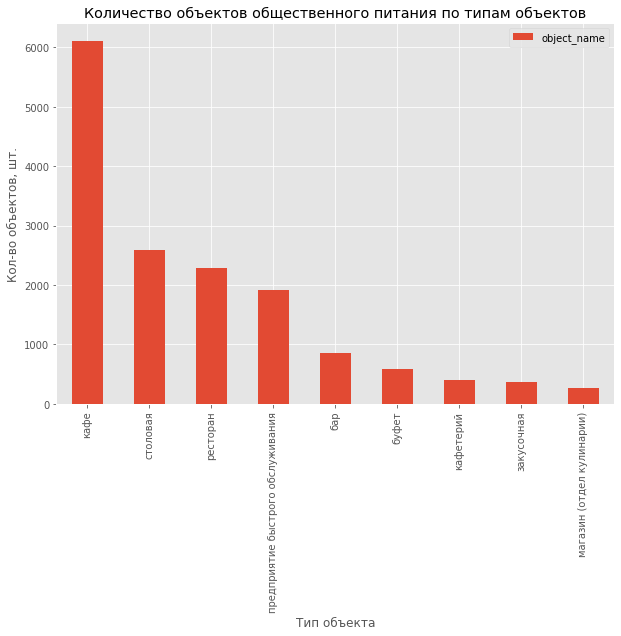

In [11]:
# Строим график
object_type_count.plot.bar(figsize = (10,7))
plt.title('Количество объектов общественного питания по типам объектов')
plt.ylabel('Кол-во объектов, шт.')
plt.xlabel('Тип объекта')
plt.show()

#### 2.1  Вывод
По типам объектов с большим отрывом лидирует "Кафе". 

#### 2.2 Исследуем соотношение сетевых и несетевых заведений по количеству. Построим график.

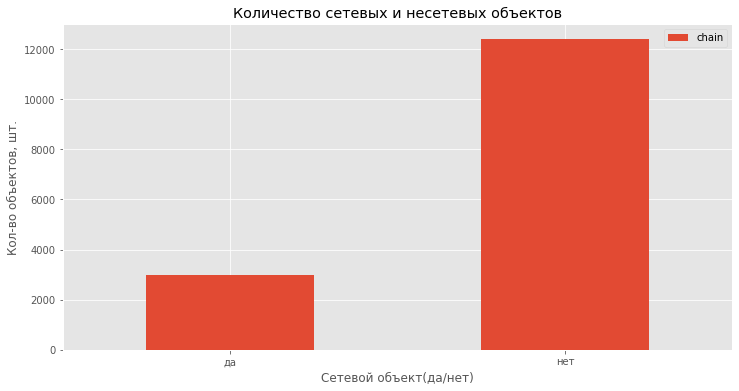

In [12]:
df.groupby('chain').agg({'chain':'count'}).plot.bar(figsize = (12,6), rot=0)
plt.title('Количество сетевых и несетевых объектов')
plt.ylabel('Кол-во объектов, шт.')
plt.xlabel('Сетевой объект(да/нет)')
plt.show()

#### 2.2 Вывод
Подавляющее большинство объектов общественного питания являются несетевыми.

#### 2.3 Для какого вида объекта общественного питания характерно сетевое распространение?

Посчитаем количество сетевых и не сетевых объектов для каждого вида объекта. 

In [13]:
dt = df.groupby(['object_type', 'chain']).agg({'object_name':'count'}).reset_index()
dt.columns = ['object_type', 'chain', 'quantity']
dt


,object_type,chain,quantity
0,бар,да,37
1,бар,нет,819
2,буфет,да,11
3,буфет,нет,574
4,закусочная,да,56
5,закусочная,нет,304
6,кафе,да,1396
7,кафе,нет,4703
8,кафетерий,да,52
9,кафетерий,нет,346


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

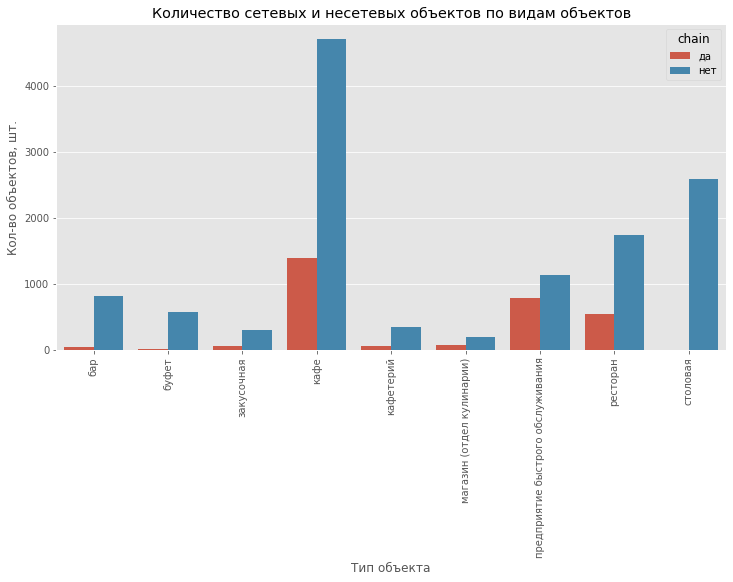

In [14]:
plt.figure(figsize=(12, 6))

sns.barplot(x="object_type", y="quantity", data=dt, hue='chain')

plt.title('Количество сетевых и несетевых объектов по видам объектов')
plt.ylabel('Кол-во объектов, шт.')
plt.xlabel('Тип объекта')
plt.xticks(rotation=90)

#### 2.3 Вывод
Преимущественно сетевое распространение характерно только для предприятий быстрого обслуживания.

#### 2.4 Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

Text(0.5, 0, 'Кол-во посадочных мест, шт.')

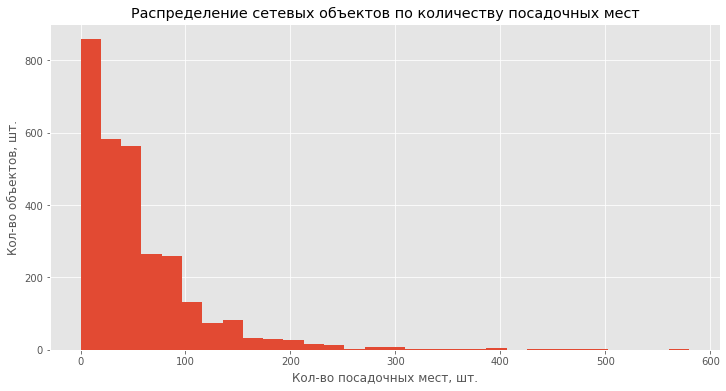

In [15]:
plt.figure(figsize=(12, 6))
df[df['chain'] == 'да']['number'].hist(bins=30)

plt.title('Распределение сетевых объектов по количеству посадочных мест')
plt.ylabel('Кол-во объектов, шт.')
plt.xlabel('Кол-во посадочных мест, шт.')

#### 2.4 Вывод
Для сетевых заведений характерно: много заведений с небольшим числом (до 50) посадочных мест в каждом.

#### 2.5 Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

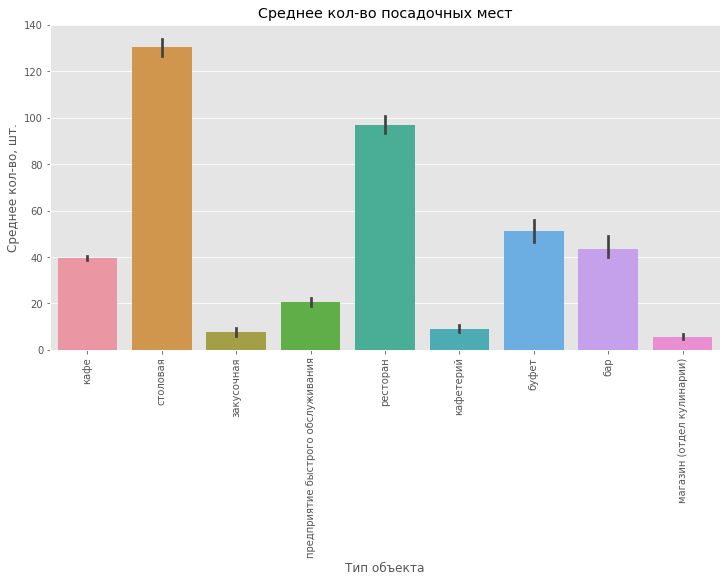

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(x="object_type", y="number", data=df)

plt.title('Среднее кол-во посадочных мест')
plt.ylabel('Среднее кол-во, шт.')
plt.xlabel('Тип объекта')
plt.xticks(rotation=90)

(-10, 250)

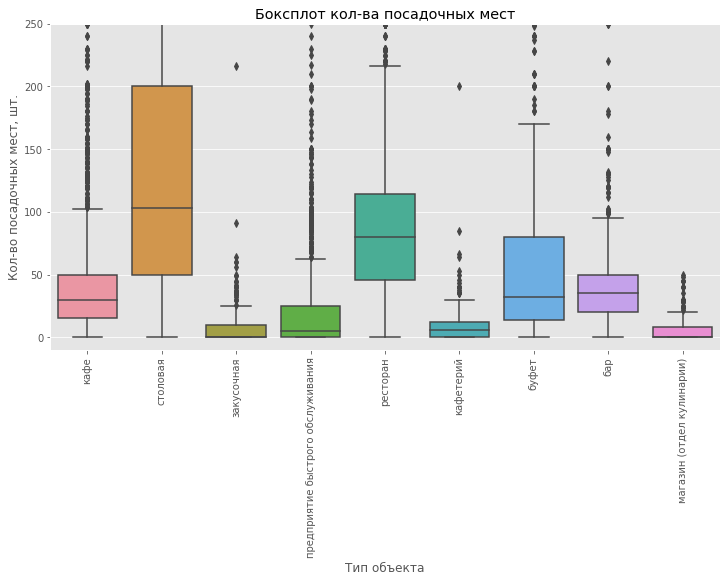

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="object_type", y="number", data=df)

plt.title('Боксплот кол-ва посадочных мест')
plt.ylabel('Кол-во посадочных мест, шт.')
plt.xlabel('Тип объекта')
plt.xticks(rotation=90)
plt.ylim(-10, 250)

#### 2.5 Вывод
Самое большое среднее количество посадочных мест предоставляет "столовая" - 130 мест и "ресторан" - 98 мест.

#### 2.6 Выделите в отдельный столбец информацию об улице из столбца address .

Для начала приведем весь текст в address к нижнему регистру.

In [18]:
df['address'] = df['address'].str.lower()
df.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город москва, улица егора абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город москва, абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50


Заберем из 'address' текст, который находится между (обрамлен с двух сторон) ', '

In [19]:
df['street'] = df['address'].str.extract('москва, (.*), ')
df.head()

,id,object_name,chain,object_type,address,number,street
0,151635,СМЕТАНА,нет,кафе,"город москва, улица егора абакумова, дом 9",48,улица егора абакумова
1,77874,Родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,"улица талалихина, дом 2/1"
2,24309,Кафе «Академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95,абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город москва, абрамцевская улица, дом 1",40,абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50,"абрамцевская улица, дом 9"


В 'street' удалим запятую с пробелом и все, что идет после.

In [20]:
df['street'] = df['street']. str.replace(', (.*)', '')
df.head()

,id,object_name,chain,object_type,address,number,street
0,151635,СМЕТАНА,нет,кафе,"город москва, улица егора абакумова, дом 9",48,улица егора абакумова
1,77874,Родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина
2,24309,Кафе «Академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95,абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город москва, абрамцевская улица, дом 1",40,абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50,абрамцевская улица


Теперь в столбце 'street' имеем название улицы.

Проверим нет ли пропусков в столбце 'street'.

In [21]:
df.isna().mean()

id             0.000000
object_name    0.000000
chain          0.000000
object_type    0.000000
address        0.000000
number         0.000000
street         0.004621
dtype: float64

Посмотрим строки с пропусками в столбце 'street'.

In [22]:
df[df['street'].isna()]

,id,object_name,chain,object_type,address,number,street
859,23601,Буфет - ГБОУ СОШ № 64,нет,буфет,"партизанская улица, дом 30",100,NaN
860,23604,Буфет - ГБОУ 60,нет,буфет,"партизанская улица, дом 30",100,NaN
1491,25349,Ресторан «Гранатовый сад»,нет,ресторан,"поречная улица, дом 5/14, строение 1",40,NaN
7691,132359,Кафе «La Carotte»,нет,кафе,"1-й нагатинский проезд, дом 10",198,NaN
7827,28214,Роснефть (закрытое),нет,столовая,"софийская набережная, дом 26/1, строение 1",80,NaN
...,...,...,...,...,...,...,...
13185,192918,Limassol,нет,кафе,"бауманская улица, дом 7, строение 3",42,NaN
13399,204788,Крошка Картошка,да,предприятие быстрого обслуживания,"солянский тупик, дом 1/4, строение 1",15,NaN
13991,204917,Шаурма на углях- Чайхана Баракат,нет,кафе,"таганская площадь, дом 88, строение 4",80,NaN
14003,211986,FRESH CAFE,нет,кафе,"шарикоподшипниковская улица, дом 5, строение 1",42,NaN


Пропуски в столбце 'street' появились в резельтате того, что у некоторых объектов не указан город. Таких записей всего 4.6%. Их удаление не скажется на результатах исследования. Удалим их.

In [23]:
# Удаление пропущеных значений
df.dropna(inplace=True)

# Проверка
df.isna().mean()

id             0.0
object_name    0.0
chain          0.0
object_type    0.0
address        0.0
number         0.0
street         0.0
dtype: float64

#### 2.6 Вывод
* В df был создан столбец 'street' с улицей на которой находится объект;
* Из df было удалено 4.6% записей в которых не был указан город.

#### 2.7 Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [24]:
top10_street = df.groupby('street').agg({'object_type': 'count'}).sort_values(by='object_type', ascending=False).head(10)

top10_street.columns = ['quantity']
top10_street

,quantity
street,
город зеленоград,232
проспект мира,204
профсоюзная улица,182
ленинградский проспект,171
пресненская набережная,167
варшавское шоссе,161
ленинский проспект,147
поселение сосенское,138
проспект вернадского,132


Первое место занимает улица "город зеленоград" и "поселение сосенское". Так получилось, потому, что для города Зеленоград в адресе указывается "город Москва, город Зеленоград...". Поскольку нас интересует Москва, то исключим из ТОП-10 Зеленоград и "поселение Сосенское.

In [25]:
error1='город зеленоград'
error2='поселение сосенское'

top10_street = df.query('street != @error1 and street != @error2').groupby('street').agg({'object_type': 'count'}).sort_values(by='object_type', ascending=False).head(10)

top10_street.columns = ['quantity']
top10_street

,quantity
street,
проспект мира,204
профсоюзная улица,182
ленинградский проспект,171
пресненская набережная,167
варшавское шоссе,161
ленинский проспект,147
проспект вернадского,132
кутузовский проспект,114
каширское шоссе,112


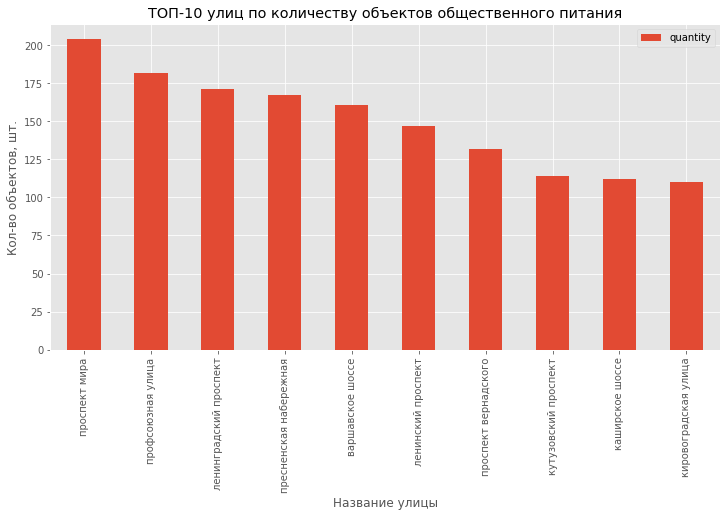

In [26]:
top10_street.plot.bar(figsize = (12,6), rot=0)
plt.title('ТОП-10 улиц по количеству объектов общественного питания')
plt.ylabel('Кол-во объектов, шт.')
plt.xlabel('Название улицы')
plt.xticks(rotation=90)
plt.show()

Определим районы для ТОП-10 улиц.

Загрузим данные с улицами и районами в которых эти улицы находятся.

In [27]:
districts = pd.read_csv('http://hubofdata.ru/storage/f/2013-10-22T09%3A25%3A27.793Z/mosgaz-streets.csv')
districts.head()

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


Оставим в districts только улицу и соответствующий ей район.

In [28]:
districts = districts[['streetname', 'area']]
districts.head()

,streetname,area
0,Выставочный переулок,Пресненский район
1,улица Гашека,Пресненский район
2,Большая Никитская улица,Пресненский район
3,Глубокий переулок,Пресненский район
4,Большой Гнездниковский переулок,Пресненский район


Приведем адреса к нижнему регистру.

In [29]:
districts['streetname'] = districts['streetname'].str.lower()
districts.head()

,streetname,area
0,выставочный переулок,Пресненский район
1,улица гашека,Пресненский район
2,большая никитская улица,Пресненский район
3,глубокий переулок,Пресненский район
4,большой гнездниковский переулок,Пресненский район


Проверим districts на пропуски.

In [30]:
districts.isna().mean()

streetname    0.0
area          0.0
dtype: float64

Проверим districts на дубликаты.

In [31]:
districts.duplicated().sum()

8

Удалим дубликаты в districts.

In [32]:
# Удаление дубликатов
districts = districts.drop_duplicates()

# Проверка
districts.duplicated().sum()

0

Таким образом в districts остались только нужные нам столбцы, дубликаты удалены, пропусков нет.

#### Районы, в которых находится не менее одной улици из top10_street.

In [33]:
top10_street.merge(districts, left_on='street', right_on='streetname', how='inner')

,quantity,streetname,area
0,204,проспект мира,Алексеевский район
1,204,проспект мира,Ярославский Район
2,204,проспект мира,Район Марьина роща
3,204,проспект мира,Останкинский район
4,204,проспект мира,Район Ростокино
5,204,проспект мира,Район Свиблово
6,204,проспект мира,Мещанский район
7,182,профсоюзная улица,Академический район
8,182,профсоюзная улица,Район Черемушки
9,182,профсоюзная улица,Район Ясенево


#### Общий список районов в которых находятся улицы из ТОП-10 (top10_street).

In [34]:
top10_street.merge(districts, left_on='street', right_on='streetname', how='inner')['area'].unique()

array(['Алексеевский район', 'Ярославский Район', 'Район Марьина роща',
       'Останкинский район', 'Район Ростокино', 'Район Свиблово',
       'Мещанский район', 'Академический район', 'Район Черемушки',
       'Район Ясенево', 'Район Коньково', 'Обручевский район',
       'Район Теплый Стан', 'Район Аэропорт', 'Район Беговой',
       'Хорошевский район', 'Район Сокол', 'Пресненский район',
       'Район Чертаново Центральное', 'Район Чертаново Северное',
       'Район Чертаново Южное', 'Донской район',
       'Район Нагатино-Садовники', 'Нагорный район',
       'Район Северное Бутово', 'Район Южное Бутово',
       'Район Проспект Вернадского', 'Район Тропарево-Никулино',
       'Район Гагаринский', 'Ломоносовский район', 'Район Якиманка',
       'Район Раменки', 'Район Дорогомилово', 'Район Фили-Давыдково',
       'Район Москворечье-Сабурово', 'Район Орехово-Борисово Южное',
       'Район Орехово-Борисово Северное'], dtype=object)

#### 2.8 Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

Найдем улицы с одним объектом общественного питания.

In [35]:
street_one_object = df.groupby('street').agg({'object_type': 'count'}).sort_values(by='object_type', ascending=True)\
                                                                        .query('object_type == 1')

street_one_object

,object_type
street,
яхромская улица,1
живарев переулок,1
улица академика понтрягина,1
жигулёвская улица,1
улица академика петровского,1
...,...
штурвальная улица,1
шубинский переулок,1
1-я напрудная улица,1


#### Таким образом имеем 540 улиц с одним объектом общественного питания.

#### Найдем список районов в которых есть улицы с одним объектом общественного питания.
Для этого используем улицы с одним объектом street_one_object и список улиц и соответствующих им районов districts.

In [36]:
street_one_object.merge(districts, left_on='street', right_on='streetname', how='inner')['area'].unique()

array(['Дмитровский район', 'Красносельский район', 'Район Южное Бутово',
       'Район Кузьминки', 'Донской район', 'Район Якиманка',
       'Район Замоскворечье', 'Даниловский район', 'Район Кунцево',
       'Район Коньково', 'Обручевский район', 'Район Измайлово',
       'Рязанский район', 'Мещанский район', 'Район Ясенево',
       'Хорошевский район', 'Район Восточный', 'Алексеевский район',
       'Район Марфино', 'Район Черемушки', 'Басманный район',
       'Тверской район', 'Район Арбат', 'Район Хамовники',
       'Район Внуково', 'Район Новогиреево', 'Район Богородское',
       'Район Преображенское', 'Район Солнцево', 'Район Соколиная Гора',
       'Район Текстильщики', 'Район Люблино', 'Пресненский район',
       'Район Покровское-Стрешнево', 'Лосиноостровский район',
       'Район Выхино-Жулебино', 'Район Косино-Ухтомский',
       'Район Лефортово', 'Район Чертаново Северное', 'Таганский район',
       'Район Марьина роща', 'Район Сокольники', 'Район Аэропорт',
       'Район

#### 2.9 Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?

Построим распределения объектов по количеству посадочных мест для top10_street. Для этого напишем функцию, которая будет строить распределение по заданной улице. Для того чтобы на всех распределениях совпадал размер корзин будем брать только те заведения у которых количество посадочных мест меньше или равно number_seets_max = 200.

In [37]:
def distribution(street):
    
    number_seets_max = 200
    
    plt.figure(figsize=(12, 6))
    df[(df['street'] == street)&(df['number'] <= number_seets_max)]['number'].hist(bins=8)

    plt.title('Распределение объектов по количеству посадочных мест на улице: {}'.format(street))
    plt.ylabel('Кол-во объектов, шт.')
    plt.xlabel('Кол-во посадочных мест, шт.')
    plt.xlim(0, 200)
    plt.ylim(0, 80)

In [38]:
# Выделяем список улиц из top10_street для дальнейшего использования его в цикле.
street_distribution = top10_street.index
street_distribution

Index(['проспект мира', 'профсоюзная улица', 'ленинградский проспект',
       'пресненская набережная', 'варшавское шоссе', 'ленинский проспект',
       'проспект вернадского', 'кутузовский проспект', 'каширское шоссе',
       'кировоградская улица'],
      dtype='object', name='street')

Построим распределения в цикле.

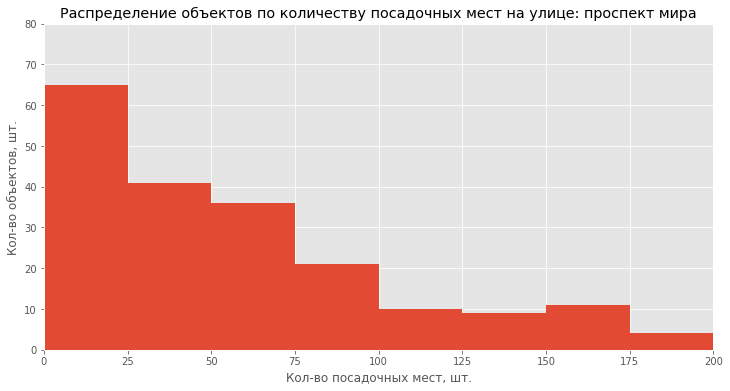

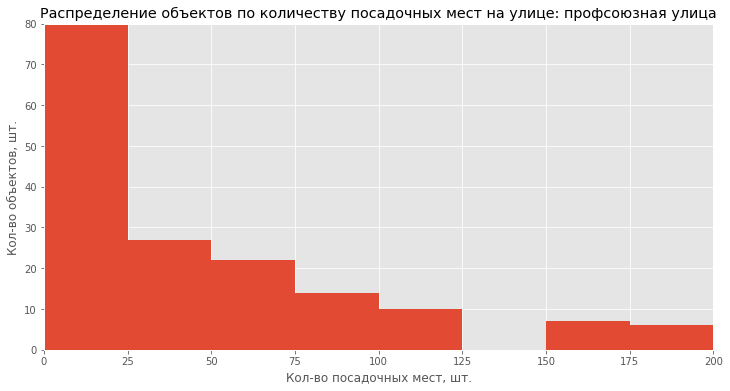

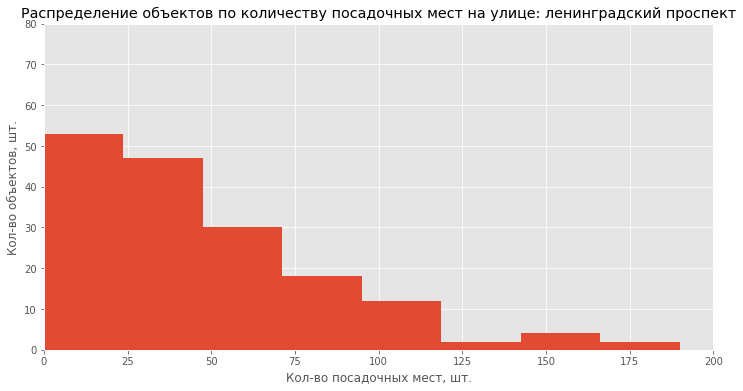

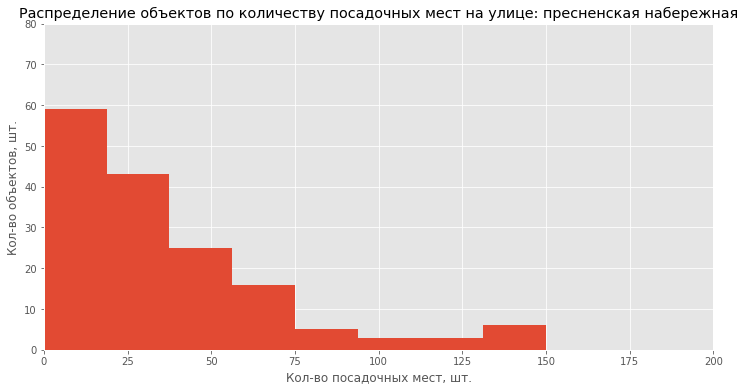

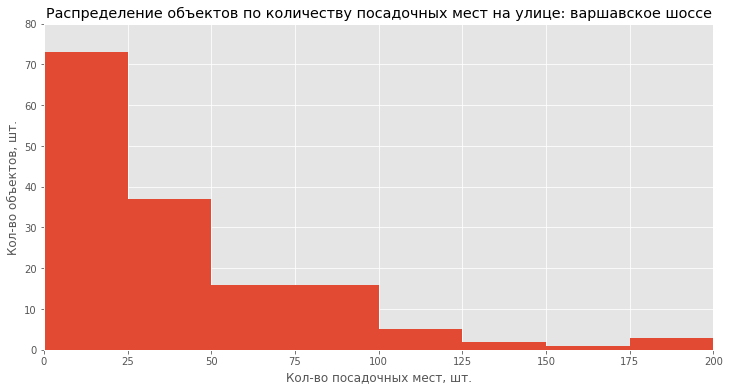

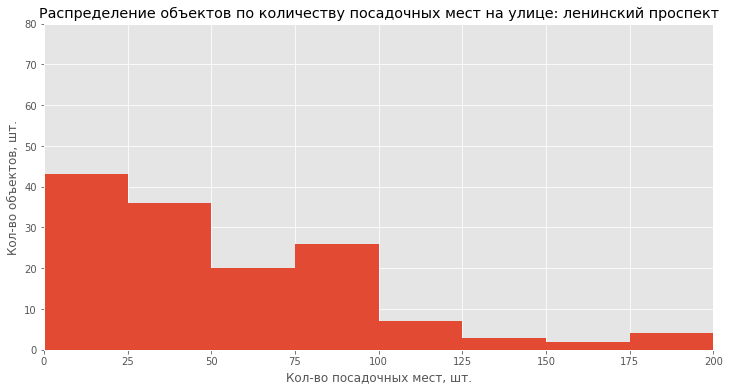

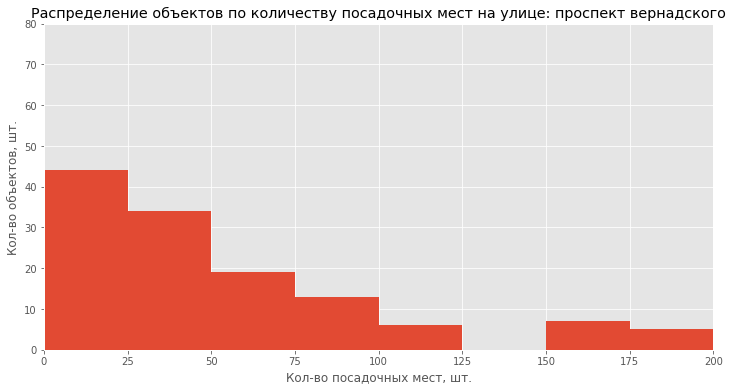

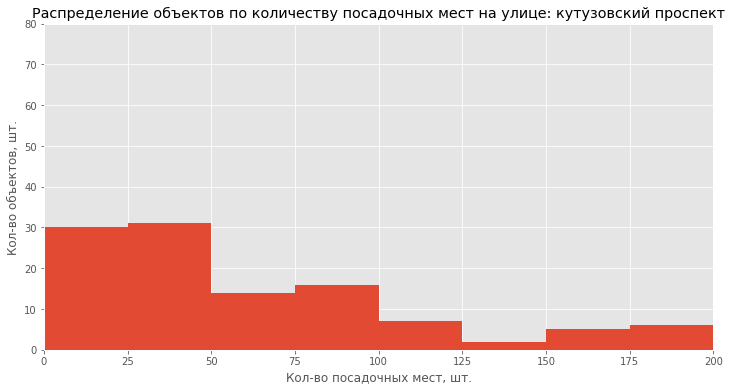

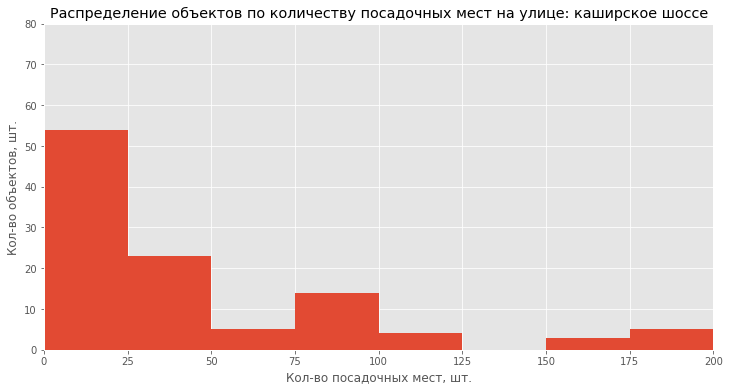

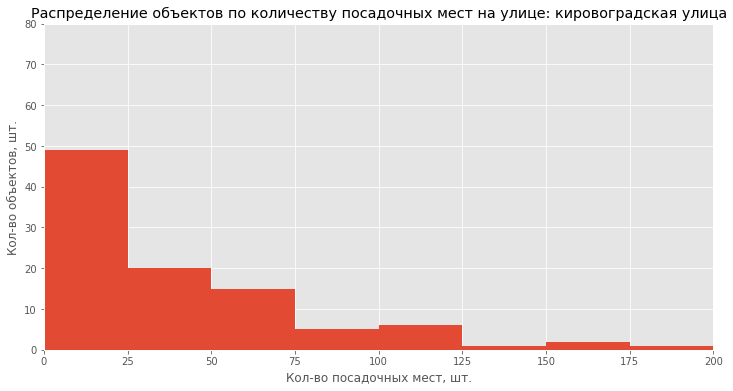

In [39]:
for row in street_distribution:
    distribution(row)

#### 2.9 Вывод
Для ТОП-10 улиц по количеству объектов общественного питания преимущественно характерны объекты с количеством посадочных мест до 50. Тем не менее практически на всех улицах присутствует весомое количество объектов с количеством посадочных мест от 50 до 100.  

### Выводы
* По типам объектов с большим отрывом лидирует "Кафе";
* Подавляющее большинство объектов общественного питания являются несетевыми;
* Преимущественно сетевое распространение характерно только для предприятий быстрого обслуживания;
* Для сетевых заведений характерно: много заведений с небольшим числом посадочных мест в каждом (до 50);
* Самое большое среднее количество посадочных мест предоставляет "столовая" - 130 мест и "ресторан" - 98 мест;

Таким образом для открытия оригинального кафе может подойти тип объекта общественного питания "Кафе" с количеством посадочных мест около 50. Для места расположения следует рассмотреть ТОП-10 улиц по количеству объектов общественного питания. Для сетевого распространения кафе одного факта обслуживания роботами скорее всего будет не достаточно для привлечения постоянной доли клиентов. Клиентами кафе скорее всего будут разовые посетители, которых привлечет необычный и интересный формат обслуживания.


Презентация: <https://yadi.sk/i/uEQbGJaA_D4UxA> 